In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import glob
import sys
import multiprocessing as mp
from tqdm import tqdm

In [12]:
train_df_path = '../data/train/train.csv'
train_path = '../data/train/images/'
eval_path = '../data/eval/images/'
train_df = pd.read_csv(train_df_path)

In [25]:
# w_lst = []
# h_lst = []
# for p in train_df.path.values:
#     paths = glob.glob(os.path.join(train_path, p, '*'))
#     for path in paths:
#         img = cv2.imread(path)
#         h, w, c = img.shape
#         w_lst.append(w)
#         h_lst.append(h)

train_paths_list = [glob.glob(os.path.join(train_path, p, '*')) for p in train_df.path.values]
def getHWCS(paths:str):
    hwc = []
    for path in paths:
        img = cv2.imread(path)
        h, w, c = img.shape
        hwc.append([h,w,c])
    return hwc
pool = mp.Pool(mp.cpu_count())
train_hwcsList = pool.map(getHWCS, tqdm(train_paths_list))
train_hwcs = np.array([hwc for hwcs in train_hwcsList for hwc in hwcs])


100%|██████████| 2700/2700 [00:05<00:00, 491.95it/s]


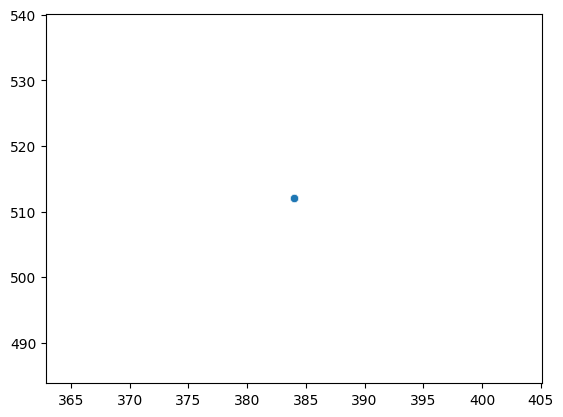

In [26]:
sns.scatterplot(
    x=train_hwcs[:, 1],
    y=train_hwcs[:, 0]
)
plt.show()

In [27]:
print(f'w : {train_hwcs[:, 1].mean()}')
print(f'h : {train_hwcs[:, 0].mean()}')


w : 384.0
h : 512.0


In [30]:
eval_paths_list = glob.glob(os.path.join(eval_path, '*'))

def getHWC(path: str):
    img = cv2.imread(path)
    h, w, c = img.shape
    return [h, w, c]

pool = mp.Pool(mp.cpu_count())
eval_hwcsList = pool.map(getHWC, tqdm(eval_paths_list))
eval_hwcs = np.array(eval_hwcsList)


100%|██████████| 12600/12600 [00:03<00:00, 3431.38it/s]


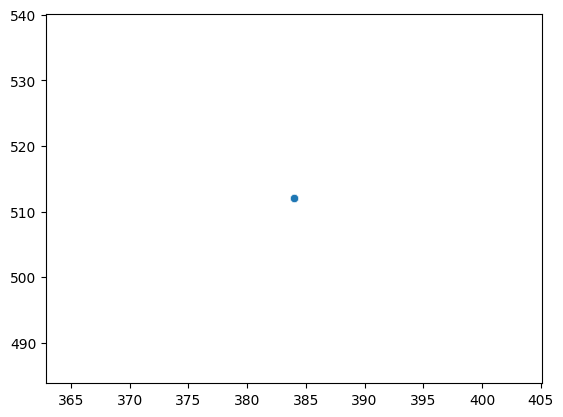

In [31]:
sns.scatterplot(
    x=eval_hwcs[:, 1],
    y=eval_hwcs[:, 0]
)
plt.show()

In [32]:
print(f'w : {eval_hwcs[:, 1].mean()}')
print(f'h : {eval_hwcs[:, 0].mean()}')


w : 384.0
h : 512.0
